In [226]:
import matplotlib.pyplot as plt
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd

In [227]:
dataframe = pd.read_csv('data.csv')
print(dataframe)

     Unnamed: 0    DTL    DTT    DVP    DXG   DXS   DXV    EIB   ELC    EMC  \
0    2020-01-02  23,10  13,50  36,40  14,30   NaN  3,48  17,70  6,20  14,10   
1    2020-01-03  23,10  13,50  36,50  13,90   NaN  3,52  17,25  6,35  14,90   
2    2020-01-06  24,70  13,50  36,50  13,70   NaN  3,29  17,50  6,40  14,90   
3    2020-01-07  26,10  13,50  36,35  13,90   NaN  3,48  17,45  6,49  15,70   
4    2020-01-08  25,00  13,50  36,00  13,30   NaN  3,48  17,30  6,50  16,30   
..          ...    ...    ...    ...    ...   ...   ...    ...   ...    ...   
738  2022-12-14  26,50  11,15  45,00  14,15  6,99  4,28  27,20  9,61  12,00   
739  2022-12-15  26,20  11,15  45,05  15,10  6,90  4,30  28,00  9,48  12,55   
740  2022-12-16  26,20  11,90  45,25  15,10  6,69  4,40  27,40  9,30  11,70   
741  2022-12-19  26,20  11,90  45,30  14,10  6,40  4,45  27,90  9,25  11,70   
742  2022-12-20  26,60  11,90  45,40  13,40  6,20  4,41  28,50  8,61  12,40   

     ...    KSB    L10    LAF    LBM   LCG   LDG   

In [228]:
def dataset_preparation(dataframe, symbols):
    dataset = dataframe[symbols].values
    if type(dataset[0]) == type('A'):
        for i in range(len(dataset)):
            dataset[i] = float(dataset[i].replace(',','.'))
    return dataset

In [229]:
def scaler_dataset(dataset):
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
    dataset = dataset.reshape(1,-1)
    dataset = scaler.fit_transform(dataset)
    return dataset.reshape(-1)

In [230]:
def draw_duo_stock(dataframe, stocks_symbol1, stocks_symbol2, stocks_symbol3, stocks_symbol4, stocks_symbol5):
    dataset = dataset_preparation(dataframe, stocks_symbol1)
    scaled_dataset = scaler_dataset(dataset)
    dataset1 = dataset_preparation(dataframe, stocks_symbol2)
    scaled_dataset1 = scaler_dataset(dataset1)
    dataset2 = dataset_preparation(dataframe, stocks_symbol3)
    scaled_dataset2 = scaler_dataset(dataset2)
    dataset3 = dataset_preparation(dataframe, stocks_symbol4)
    scaled_dataset3 = scaler_dataset(dataset3)
    dataset4 = dataset_preparation(dataframe, stocks_symbol5)
    scaled_dataset4 = scaler_dataset(dataset4)
    fig, axs = plt.subplots(1,2)
    # fig.suptitle(stocks_symbol + " stock symbol")
    fig.set_size_inches(12,4.0)
    axs[0].set(title="Before scale")
    axs[1].set(title="After scale")
    axs[0].plot(dataframe.index.values, dataset, 'g')
    axs[1].plot(dataframe.index.values, scaled_dataset, 'g')
    axs[0].plot(dataframe.index.values, dataset1, 'r')
    axs[1].plot(dataframe.index.values, scaled_dataset1, 'r')
    axs[0].plot(dataframe.index.values, dataset2, 'b')
    axs[1].plot(dataframe.index.values, scaled_dataset2, 'b')
    axs[0].plot(dataframe.index.values, dataset3, 'w')
    axs[1].plot(dataframe.index.values, scaled_dataset3, 'w')
    axs[0].plot(dataframe.index.values, dataset4, 'c')
    axs[1].plot(dataframe.index.values, scaled_dataset4, 'c')

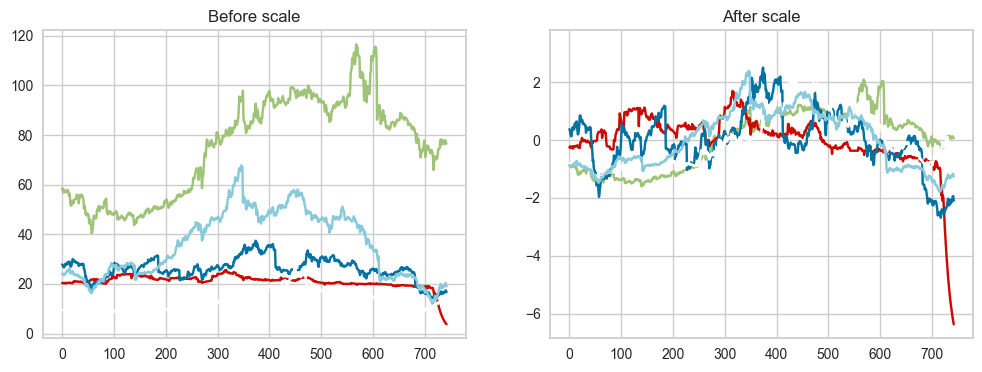

In [231]:
draw_duo_stock(dataframe, 'FPT', 'IBC', 'HDB', 'ITD', 'HPG')

In [232]:
# draw_duo_stock(dataframe, 'IBC')

In [233]:
# draw_duo_stock(dataframe, 'HDB')

In [234]:
# draw_duo_stock(dataframe, 'ITD')

In [235]:
# draw_duo_stock(dataframe, 'HPG')

In [236]:
dataframe = pd.read_csv('data.csv', index_col=0)
print(dataframe)


              DTL    DTT    DVP    DXG   DXS   DXV    EIB   ELC    EMC    EVE  \
2020-01-02  23,10  13,50  36,40  14,30   NaN  3,48  17,70  6,20  14,10  10,75   
2020-01-03  23,10  13,50  36,50  13,90   NaN  3,52  17,25  6,35  14,90  10,50   
2020-01-06  24,70  13,50  36,50  13,70   NaN  3,29  17,50  6,40  14,90  10,70   
2020-01-07  26,10  13,50  36,35  13,90   NaN  3,48  17,45  6,49  15,70  10,65   
2020-01-08  25,00  13,50  36,00  13,30   NaN  3,48  17,30  6,50  16,30  10,55   
...           ...    ...    ...    ...   ...   ...    ...   ...    ...    ...   
2022-12-14  26,50  11,15  45,00  14,15  6,99  4,28  27,20  9,61  12,00  14,20   
2022-12-15  26,20  11,15  45,05  15,10  6,90  4,30  28,00  9,48  12,55  14,80   
2022-12-16  26,20  11,90  45,25  15,10  6,69  4,40  27,40  9,30  11,70  14,80   
2022-12-19  26,20  11,90  45,30  14,10  6,40  4,45  27,90  9,25  11,70  14,10   
2022-12-20  26,60  11,90  45,40  13,40  6,20  4,41  28,50  8,61  12,40  14,20   

            ...    KSB    L

In [237]:
import math
X_train = dataframe.values
for i in range(len(X_train)):
    for j in range(len(X_train[i])):
        if type(X_train[i][j]) == type('a'):
            X_train[i][j] = float(X_train[i][j].replace(',','.'))
        else:
            if math.isnan(X_train[i][j]):
                X_train[i][j] = 0

X_train = X_train.reshape(100, 743,1)
print(len(X_train))

print(X_train)


100
[[[23.1]
  [13.5]
  [36.4]
  ...
  [14.35]
  [11.4]
  [2.6]]

 [[21.45]
  [27.9]
  [22.0]
  ...
  [19.2]
  [25.9]
  [0]]

 [[9.5]
  [2.7]
  [29.2]
  ...
  [18.95]
  [18.55]
  [18.7]]

 ...

 [[2.41]
  [15.35]
  [14.75]
  ...
  [4.11]
  [3.64]
  [8.9]]

 [[20.3]
  [47.3]
  [4.08]
  ...
  [24.45]
  [19.2]
  [6.99]]

 [[2.97]
  [51.2]
  [12.95]
  ...
  [54.0]
  [3.21]
  [21.0]]]


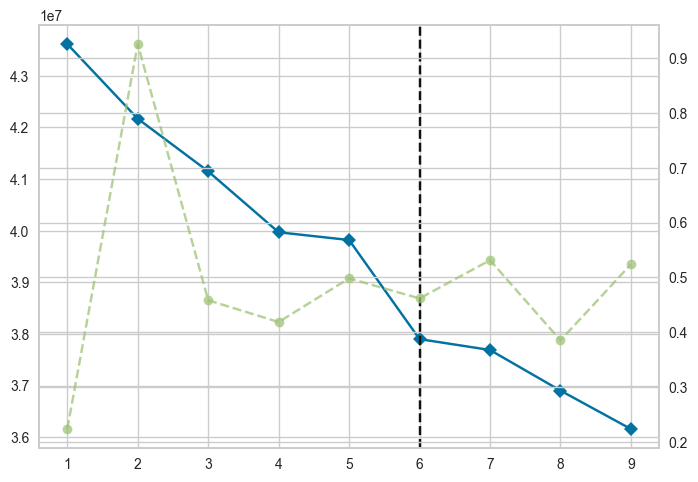

In [238]:
from yellowbrick.cluster import KElbowVisualizer
from tslearn.preprocessing import TimeSeriesResampler
from tslearn.clustering import TimeSeriesKMeans
visualizer = KElbowVisualizer(TimeSeriesKMeans() , k = (1,10), timing=True).fit(X_train.reshape(100,743).transpose())

In [239]:
seed = 0
sz = X_train.shape[1]

Euclidean k-means
97.733 --> 66.671 --> 66.049 --> 65.814 --> 65.814 --> 
[2 5 3 2 5 1 2 2 5 2 2 5 1 2 2 5 2 2 5 3 2 2 5 2 2 2 3 2 5 5 2 2 2 3 5 5 2
 2 2 2 3 5 5 3 0 2 2 3 2 5 3 0 2 2 3 5 5 2 2 2 2 2 5 5 2 2 2 2 3 5 2 2 2 2
 2 2 5 1 2 2 4 5 2 5 1 2 2 4 2 2 5 1 2 2 5 5 2 5 1 2]


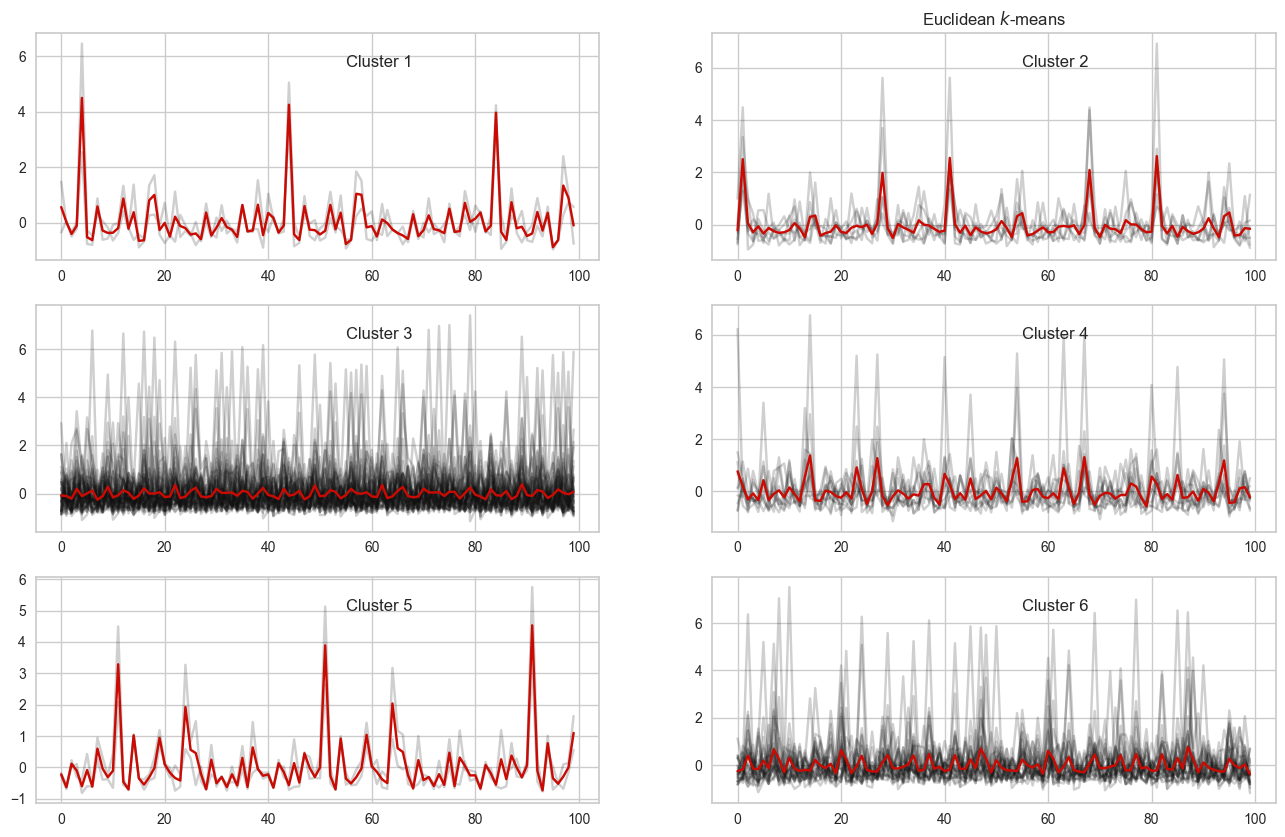

In [240]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
X_train = TimeSeriesResampler(sz = 100).fit_transform(X_train)
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=6, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train[:100])
print(y_pred)

plt.figure(figsize=(16, 10))
for yi in range(6):
    plt.subplot(3, 2, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx, "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi], "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")
   

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

14.641 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


10.461 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


10.257 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


10.225 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


10.225 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

15.463 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


10.777 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


10.642 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.1s finished


10.642 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    0.0s finished


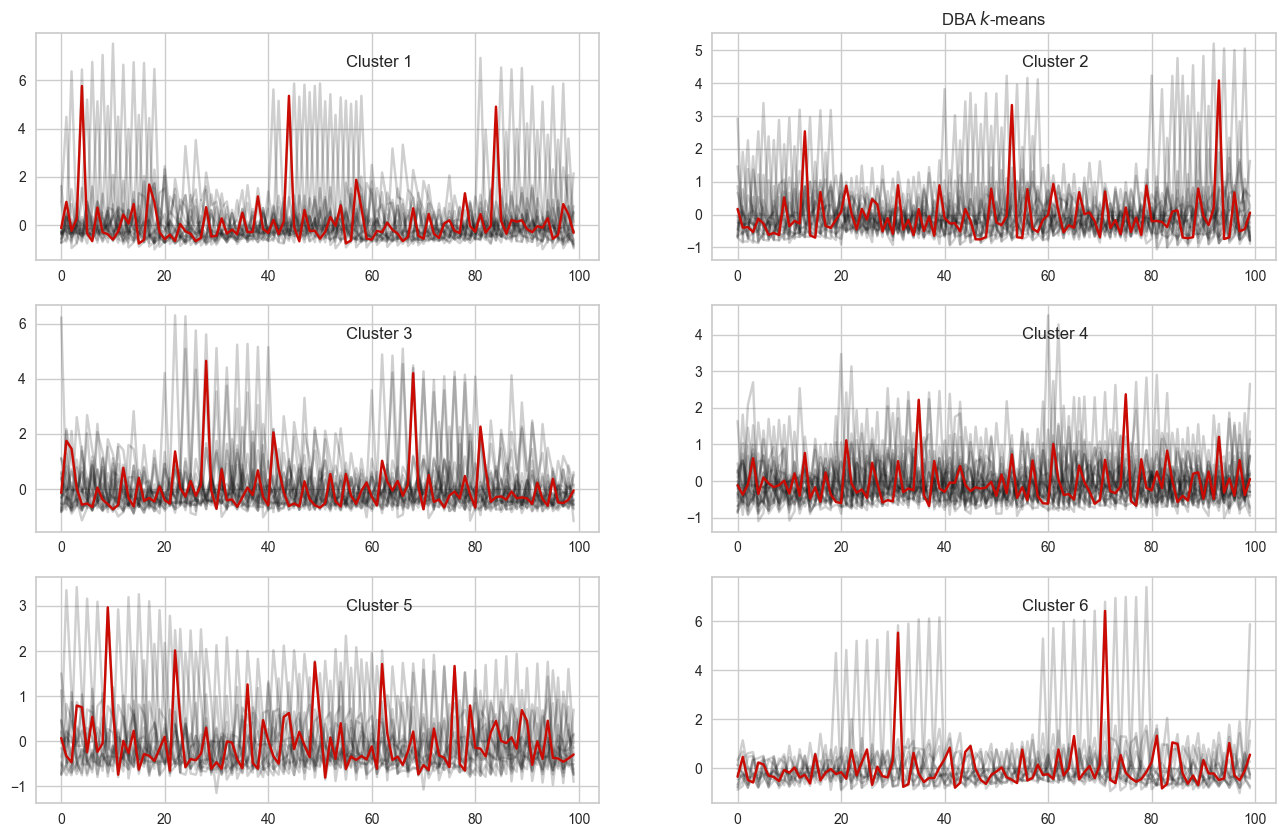

In [241]:
 
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=6,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train[:100])


plt.figure(figsize=(16, 10))
for yi in range(6):
    plt.subplot(3, 2, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx, "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi], "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")



Soft-DTW k-means
285.525 --> 150.651 --> 144.731 --> 144.681 --> 144.663 --> 144.540 --> 144.476 --> 144.442 --> 144.356 --> 144.341 --> 144.310 --> 144.319 --> 144.311 --> 144.316 --> 144.307 --> 144.313 --> 144.306 --> 144.309 --> 144.306 --> 144.307 --> 144.305 --> 144.306 --> 144.304 --> 144.305 --> 144.304 --> 144.305 --> 144.304 --> 144.304 --> 144.304 --> 144.304 --> 144.304 --> 144.304 --> 144.304 --> 144.304 --> 144.304 --> 144.304 --> 144.304 --> 144.304 --> 144.303 --> 144.304 --> 144.303 --> 144.303 --> 144.303 --> 144.303 --> 144.303 --> 144.303 --> 144.303 --> 144.303 --> 144.303 --> 144.303 --> 


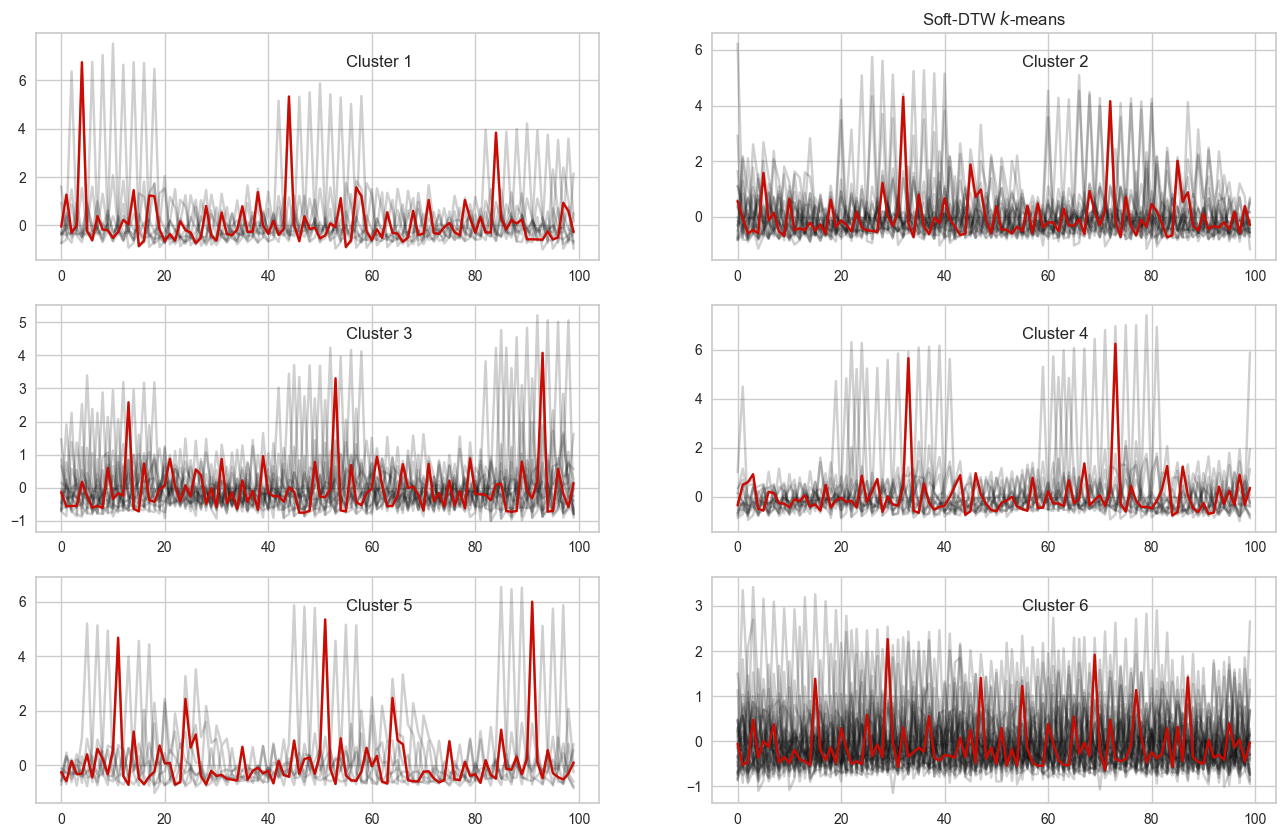

In [242]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=6,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train[:100])

plt.figure(figsize=(16, 10))
for yi in range(6):
    plt.subplot(3, 2, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx, "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi], "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

In [243]:
data = pd.read_csv('data.csv')
print(data)

     Unnamed: 0    DTL    DTT    DVP    DXG   DXS   DXV    EIB   ELC    EMC  \
0    2020-01-02  23,10  13,50  36,40  14,30   NaN  3,48  17,70  6,20  14,10   
1    2020-01-03  23,10  13,50  36,50  13,90   NaN  3,52  17,25  6,35  14,90   
2    2020-01-06  24,70  13,50  36,50  13,70   NaN  3,29  17,50  6,40  14,90   
3    2020-01-07  26,10  13,50  36,35  13,90   NaN  3,48  17,45  6,49  15,70   
4    2020-01-08  25,00  13,50  36,00  13,30   NaN  3,48  17,30  6,50  16,30   
..          ...    ...    ...    ...    ...   ...   ...    ...   ...    ...   
738  2022-12-14  26,50  11,15  45,00  14,15  6,99  4,28  27,20  9,61  12,00   
739  2022-12-15  26,20  11,15  45,05  15,10  6,90  4,30  28,00  9,48  12,55   
740  2022-12-16  26,20  11,90  45,25  15,10  6,69  4,40  27,40  9,30  11,70   
741  2022-12-19  26,20  11,90  45,30  14,10  6,40  4,45  27,90  9,25  11,70   
742  2022-12-20  26,60  11,90  45,40  13,40  6,20  4,41  28,50  8,61  12,40   

     ...    KSB    L10    LAF    LBM   LCG   LDG   

In [244]:
training_set = data['FPT'].values
print(training_set)

['58,60' '57,60' '57,00' '58,10' '56,80' '57,60' '57,50' '57,10' '57,00'
 '57,00' '58,00' '57,60' '57,40' '55,50' '56,50' '54,70' '52,00' '51,50'
 '51,80' '52,00' '53,60' '53,30' '52,60' '53,60' '54,10' '54,30' '54,50'
 '54,20' '56,00' '55,70' '55,80' '54,70' '52,50' '54,00' '55,00' '56,00'
 '55,10' '55,70' '55,90' '55,50' '54,60' '54,00' '50,30' '51,70' '50,80'
 '48,10' '48,15' '47,60' '48,50' '48,40' '47,70' '47,70' '44,40' '44,50'
 '46,00' '44,20' '43,10' '40,40' '41,10' '42,30' '44,60' '47,50' '47,30'
 '46,85' '46,85' '46,40' '46,50' '49,50' '50,10' '50,30' '51,20' '51,30'
 '49,30' '51,10' '51,00' '51,00' '50,70' '50,70' '50,80' '50,50' '50,90'
 '52,90' '53,50' '53,70' '54,00' '54,40' '49,35' '48,70' '48,00' '48,35'
 '49,25' '48,90' '49,30' '48,45' '48,45' '48,80' '48,00' '48,00' '47,95'
 '48,30' '48,00' '48,65' '48,40' '48,70' '49,35' '48,95' '48,80' '46,00'
 '47,00' '46,00' '46,60' '46,35' '46,60' '47,00' '47,00' '47,55' '47,20'
 '46,80' '46,85' '46,05' '45,65' '46,20' '46,15' '4

In [245]:
for i in range(len(training_set)):
    training_set[i] = float(training_set[i].replace(',','.'))

In [246]:
print(training_set)

[58.6 57.6 57.0 58.1 56.8 57.6 57.5 57.1 57.0 57.0 58.0 57.6 57.4 55.5
 56.5 54.7 52.0 51.5 51.8 52.0 53.6 53.3 52.6 53.6 54.1 54.3 54.5 54.2
 56.0 55.7 55.8 54.7 52.5 54.0 55.0 56.0 55.1 55.7 55.9 55.5 54.6 54.0
 50.3 51.7 50.8 48.1 48.15 47.6 48.5 48.4 47.7 47.7 44.4 44.5 46.0 44.2
 43.1 40.4 41.1 42.3 44.6 47.5 47.3 46.85 46.85 46.4 46.5 49.5 50.1 50.3
 51.2 51.3 49.3 51.1 51.0 51.0 50.7 50.7 50.8 50.5 50.9 52.9 53.5 53.7
 54.0 54.4 49.35 48.7 48.0 48.35 49.25 48.9 49.3 48.45 48.45 48.8 48.0
 48.0 47.95 48.3 48.0 48.65 48.4 48.7 49.35 48.95 48.8 46.0 47.0 46.0 46.6
 46.35 46.6 47.0 47.0 47.55 47.2 46.8 46.85 46.05 45.65 46.2 46.15 46.25
 46.8 47.45 47.7 48.35 47.8 48.65 48.55 48.6 48.6 48.1 47.4 47.8 47.4
 47.75 45.9 43.7 45.7 44.55 45.15 44.5 45.9 46.55 47.0 46.8 47.1 47.2 47.0
 47.5 47.95 47.8 47.0 46.85 46.85 47.05 47.4 48.45 48.85 48.4 49.85 49.9
 49.5 49.9 50.4 50.0 48.5 49.5 49.2 49.2 49.15 49.3 50.0 50.5 50.0 51.2
 51.2 51.3 51.1 50.5 50.8 51.1 50.2 50.0 50.8 50.3 50.5 50.5 5

In [247]:
training_set = training_set.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
training_set_scaled = scaler.fit_transform(training_set)
print(training_set_scaled)

[[0.23884514]
 [0.22572178]
 [0.21784777]
 [0.23228346]
 [0.2152231 ]
 [0.22572178]
 [0.22440945]
 [0.2191601 ]
 [0.21784777]
 [0.21784777]
 [0.23097113]
 [0.22572178]
 [0.22309711]
 [0.19816273]
 [0.21128609]
 [0.18766404]
 [0.15223097]
 [0.14566929]
 [0.1496063 ]
 [0.15223097]
 [0.17322835]
 [0.16929134]
 [0.16010499]
 [0.17322835]
 [0.17979003]
 [0.1824147 ]
 [0.18503937]
 [0.18110236]
 [0.20472441]
 [0.2007874 ]
 [0.20209974]
 [0.18766404]
 [0.15879265]
 [0.17847769]
 [0.19160105]
 [0.20472441]
 [0.19291339]
 [0.2007874 ]
 [0.20341207]
 [0.19816273]
 [0.18635171]
 [0.17847769]
 [0.12992126]
 [0.14829396]
 [0.13648294]
 [0.10104987]
 [0.10170604]
 [0.09448819]
 [0.10629921]
 [0.10498688]
 [0.09580052]
 [0.09580052]
 [0.05249344]
 [0.05380577]
 [0.07349081]
 [0.04986877]
 [0.03543307]
 [0.        ]
 [0.00918635]
 [0.02493438]
 [0.05511811]
 [0.09317585]
 [0.09055118]
 [0.08464567]
 [0.08464567]
 [0.07874016]
 [0.08005249]
 [0.11942257]
 [0.12729659]
 [0.12992126]
 [0.14173228]
 [0.14

In [248]:
x_train = []
y_train = []

n_future = 1

for i in range(len(training_set_scaled) - 1):
    x_train.append(training_set_scaled[i,0])
    y_train.append(training_set_scaled[i + 1, 0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [249]:
fnn = Sequential()

fnn.add(Dense(units = 1, activation = 'relu'))
fnn.add(Dropout(0.2))

fnn.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])
fnn.fit(x_train, y_train, epochs=100, batch_size=1)

NameError: name 'Sequential' is not defined